<a href="https://colab.research.google.com/github/rmarques0/ads4i_rmarques0/blob/master/ADS_RodrigoSMarques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Contextualização

A economia da Região Sudeste do Brasil é muito forte e diversificada, sendo considerada a maior do país, que ganhou esse reconhecimento desde o período café com leite, em que essas duas mercadorias eram as mais importantes para a capitalização brasileira. É o local mais industrializado do Brasil e o ramo industrial é diversificado e forte. Alguns dos mais importantes ramos industriais da região são: as automobilística (com mais força em São Paulo), siderúrgica (São Paulo, Rio de Janeiro e Espírito Santo), petroquímica (Rio de Janeiro, São Paulo e Minas Gerais), navais (Rio de Janeiro) petrolífera ( Rio de janeiro e Espirito Santo). Na agricultura, os principais produtos cultivados são: cana-de-açúcar, café, algodão, milho, mandioca, arroz, feijão e frutas. Na pecuária, o maior rebanho são os dos bovinos, e o estado de Minas Gerais é o principal criador. Eqüinos e suínos também são encontrados. Também há prática o extrativismo mineral, cujos principais minérios explorados são ferro, manganês, ouro e pedras preciosas. As maiores jazidas são encontradas no estado de Minas Gerais.

Também é responsável por cerca de 55% do PIB Nacional (Produto Interno Bruto) brasileiro, e por isso, é conhecida como a "locomotiva econômica do Brasil". No ano de 2010, a região produziu 2,1 trilhões de reais em riquezas, segundo dados das Contas Nacionais, do Instituto Brasileiro de Geografia e Estatística (IBGE), sendo apenas o Estado de São Paulo responsável por 1,2 trilhão dessa produção, o equivalente a 33,1% do PIB nacional, que segundo Carlos Alberto Azzoni, professor da Faculdade de Economia da Universidade de São Paulo (FEA-USP), "As melhores empresas e os melhores profissionais de todo Brasil são atraídos pelos potenciais de mercado e as oportunidades de rendimento de São Paulo". Em 2014, o PIB da região chegou a 3.2 trilhões, com a taxa de desemprego de 7,3% e uma renda per capita de 37.2 mil reais.

[Texto Completo](https://pt.wikipedia.org/wiki/Economia_da_Regi%C3%A3o_Sudeste_do_Brasil)

**Neste projeto, almejamos prever o consumo elétrico industrial da região Sudeste para os próximos 24 meses**

# Conclusões

### Modelagem
Conheci a biblioteca PyCareti há poucos dias, quando me deparei com um compartilhamento dessa no LinkedIn. Achei uma proposta bastante interessante e aproveitei o desafio para colocar em prática esse novo conhecimento. A utilização dessa biblioteca possibilitou automatizar boa parte da modelagem, e principalmente na comparação entre os modelos. Outros modelos mais robustos são possíveis, porém optei por utilizar somente os algorítimos já presentes no pacote. 
[Documentação da biblioteca](https://pycaret.org/guide/)
<br><br>

### Comparação entre modelos
Apesar de disponibilizar vários parâmetros, optei por selecionar os modelos de acordo com o Mean Absolute Error de cada um. Essa ja é uma medida comumente utilizada e ofereceu os melhores resultados diante dos testes realizados. Essa função também já nos possibilita *rankear* os resultados e criar um objeto com os melhores algorítimos.
<br><br>

### Variáveis explicativas
A seleção das variáveis foi realizada em algumas etapas:
1. Comparação da mesma medida consumo industrial da região Sudeste com as demais.
2. Comparação entre o consumo industrial e consumo das outras categorias, somente para a região Sudeste.
3. Matriz de correlação com todas as variáveis do dataset, separadas em subdatasets por região.
4. Expertise e sensibilidade no assunto relacionado.

Na análise das variáveis, percebemos que poucas medidas estão fortemente correlacionadas com o consumo industrial da região Sudeste, são elas: 
- ind_ne (alto), 
- pin_ne (moderado)
- pim_s (alto)

Como resultado do treinamento dos modelos, as variáveis de maior importância, em ordem decrescente, são:
- pim_se
- ind_ne
- data_tidy_month_4
- du
- month
<br><br>

# Resultados
- Como esperado, a Produção Industrial da Região Sudeste tem, obviamente, forte influência no consumo elétrico da categoria. 
- As crises de 2008 e 2020 são situações bem atípicas e refletem um cenário caótico dos perfis de consumo, porém para o ano de 2020 a simulação ficou bem próxima ao realizado.
- Outro ponto que se destaca é a influência do mês de Abril no consumo elétrico industrial. Talvez por influência das temperaturas, ou proximidade com período de férias. Esse ponto deverá ser melhor analizado em passos futuros. 
- Como o consumo elétrico no brasil é bastante influenciado pelo mês do ano (devido a feriados, comemorações, comportamentos em massa), é possivel observar essa influência (moderada) também para o perfil do consumo estudado.
![forecast.png](https://github.com/rmarques0/ads4i_rmarques0/raw/master/forecast.png)
<br><br>

# Próximos passos

Por se tratar de uma análise mais preliminar de um assunto complexo e com inúmetras variáveis passíveis de ser consideradas, já é possivel apontar alguns passos para melhorar a análise.

- Fazer o estudo utilizando um intervalo maior de datas.
- Incorporar informações como: 
  - Estação do ano
  - Índices econômicos:  *PIB, Taxa de Desemprego, IPI – Índice de Produção Industrial, IPPI – Índice de Preços na Produção Industrial, VN (ou IVVN) – Índice de Volume de Negócios, IE (ou INPS) – Índice de Emprego (número de pessoas ao serviço), IR (ou IREM) – Índice de Remunerações,
IHT (ou IHOR) – Índice de horas trabalhadas.*
  - Consumo por setor
- Stadização dos dados: 
  - Sazonalidade
  - Série estacionária
- Testar diferentes técnicas de processamento de dados e modelos de aprendizagem



---
---

# Instalando Bibliotecas e Dados


Neste projeto, a principal biblioteca que utilizaremos é a PyCaret, a qual se trata de uma biblioteca de aprendizado de máquina de código aberto e baixo código em Python que visa reduzir o tempo de ciclo de hipóteses a insights. O PyCaret permite que você vá desde a preparação de seus dados até a implantação de seu modelo em segundos. Além dessa, utilizaremos também bibliotecas tradicionais para processamento de dados (Pandas), algebra linear (Numpy) e plot das informações (Matplotlib, Seaborn, Plotly).


In [ ]:
#Instaling pycaret
!pip install pycaret[full]

In [ ]:
from pycaret.regression import * # module to work with regression
import numpy as np # linear algebra
import pandas as pd # data processing

# Plotting 
import seaborn as sns
import plotly as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt

# Setup pandas to show all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

# Import of dataset
df0 = pd.read_excel('https://github.com/rmarques0/ads4i_rmarques0/raw/master/Bases_Final_ADS_Jun2021.xlsx', sheet_name="dados")


# Overview dos dados

Iremos primeiramente ter uma idéia geral dos dados. Os objetivos dessa sessão são:
* Identificar dados nulos e tratar
* Investigar tendências e correlações
* Comparar diferentes panoramas
* Selecionar principais atributos a serem utilizados no modelo de previsão.

Nesse primeiro momentos é possivel observar que os atributos *renda_r* e *massa_r* contém valores nulos. A seguir iremos investigar melhor a necessidade de utilizá-los.


In [ ]:
# Overview of first rows
df0.head()

,data_tidy,com_co,com_n,com_ne,com_s,com_se,ind_co,ind_n,ind_ne,ind_s,ind_se,res_co,res_n,res_ne,res_s,res_se,renda_r,pop_ocup_br,massa_r,du,pmc_a_co,temp_max_co,temp_min_co,pmc_r_co,pim_co,pmc_a_n,temp_max_n,temp_min_n,pmc_r_n,pim_n,pmc_a_ne,temp_max_ne,temp_min_ne,pmc_r_ne,pim_ne,pmc_a_s,temp_max_s,temp_min_s,pmc_r_s,pim_s,pmc_a_se,temp_max_se,temp_min_se,pmc_r_se,pim_se
0,2004-01-01,307.28207,193.80956,589.29026,704.00174,2450.45329,364.326990,840.29035,2015.78331,1810.98019,6977.47082,506.54049,348.58478,1098.66359,1132.50601,3694.38561,NaN,75777.696766,NaN,21,41.454,31.344701,22.248656,45.711,59.0,32.407,31.983871,23.353226,39.582,65.252,36.613,30.408065,23.430242,38.820,87.8,49.488,28.320430,19.165591,54.848,78.497,50.755550,27.618279,20.365591,47.369,75.454326
1,2004-02-01,290.14685,175.49530,550.77261,733.89486,2396.96520,372.651510,810.25628,1942.01969,1931.86643,7084.62266,472.10253,323.40268,1000.22133,1121.97048,3511.54126,NaN,76464.330910,NaN,18,39.854,30.819461,21.332451,44.365,63.2,30.021,31.277012,23.041954,35.929,62.180,33.932,30.465517,23.208190,36.268,78.9,46.932,28.213793,18.634483,51.696,80.047,48.108250,28.047126,20.089655,45.738,72.953183
2,2004-03-01,307.10015,182.75690,573.02799,738.45706,2402.52074,408.630620,880.88796,2082.25048,2149.03063,7087.61326,493.18088,320.23737,1049.43716,1108.02732,3629.45543,NaN,75925.410718,NaN,23,46.245,31.649770,21.136021,50.427,70.5,33.292,31.575269,23.253226,39.125,76.728,39.008,30.930242,23.439919,40.177,88.1,54.556,27.595699,17.848387,57.356,95.784,54.134850,28.181720,19.749463,49.252,83.942665
3,2004-04-01,329.16091,189.49076,603.93873,743.57047,2580.91388,419.430051,861.61210,2056.94675,2164.76220,7384.53963,506.07092,339.77486,1097.25059,1132.04707,3733.86311,NaN,77102.272116,NaN,20,45.065,30.372381,20.808889,50.649,65.0,33.740,32.407222,23.251667,40.121,75.084,37.197,30.561667,23.271250,39.593,81.5,53.024,26.797778,17.729310,58.216,92.275,52.015075,27.537778,19.650000,49.755,79.495481
4,2004-05-01,303.23791,191.64219,570.17652,696.57947,2344.08400,407.523810,901.70980,2100.19137,2164.98022,7258.30672,492.80831,332.15491,1033.00684,1082.10257,3537.26872,NaN,77353.867496,NaN,21,47.724,25.491060,16.872043,53.663,73.7,37.340,31.824194,22.543548,45.135,75.820,40.033,30.373683,22.742742,42.347,85.2,54.860,20.615054,12.606452,60.436,92.550,54.345225,25.391398,17.573118,51.849,84.187962


A seguir temos um resumo de das principais informações do dataset.<br>
**Dimensões do dataset:**  (228, 46) <br> 
**Percentual de dados nulos:**
* Com aproximadamente 43%: massa_r, renda_r (essas colunas serão desconsideradas na modelagem) <br>
* As medições de consumo Industrial, Residencial e Comercial possui aproximadamente 10% de dados faltantes. 

Vale observar que esses dados fazem parte do período que utilizaremos para o forecast. Dessa forma trataremos essas informações no pipeline do PyCaret


In [ ]:
print ( 'Dimensões do dataset: ', df0.shape,'\n')
print ( 'Formatos dos dados:') 
print ( df0.info(), '\n')
print ( 'Visão geral dos dados numéricos:\n', df0.describe().round(2), '\n')
print ( 'Contagem de dados únicos:\n', df0.nunique(), '\n')
print ( 'Contagem de valores nulos:\n', df0.isnull().sum(), '\n')
print ( 'Percentual de dados nulos:\n', (df0.isna().sum()/df0.isna().count() *100).sort_values(ascending=False), '\n')

Para melhor analisar a correlação das variáveis de cada região com a nossa variável de interesse, iremos separar noss dataset original em regiões. Dessa forma melhoraremos a performance da execução dos códigos, bem como facilitar a exploração das informações de maneria categorizada.



In [ ]:
# Create a dataset for each region
# Select columns
df0['dow'] = df0['data_tidy'].dt.dayofweek
cols_se = ['data_tidy', 'dow', 'pop_ocup_br', 'du', 'pmc_a_se','temp_max_se', 'temp_min_se', 'pmc_r_se', 'pim_se','com_se', 'res_se','ind_se']
cols_co = ['data_tidy', 'dow', 'pop_ocup_br', 'du', 'pmc_a_co','temp_max_co', 'temp_min_co', 'pmc_r_co', 'pim_co','com_co', 'res_co','ind_co','ind_se']
cols_n  = ['data_tidy', 'dow', 'pop_ocup_br', 'du', 'pmc_a_n','temp_max_n', 'temp_min_n', 'pmc_r_n', 'pim_n','com_n', 'res_n','ind_n','ind_se']
cols_ne = ['data_tidy', 'dow', 'pop_ocup_br', 'du', 'pmc_a_ne','temp_max_ne', 'temp_min_ne', 'pmc_r_ne', 'pim_ne','com_ne', 'res_ne','ind_ne','ind_se']
cols_s  = ['data_tidy', 'dow', 'pop_ocup_br', 'du', 'pmc_a_s','temp_max_s', 'temp_min_s', 'pmc_r_s', 'pim_s','com_s', 'res_s','ind_s','ind_se']
#Create datasets
dfse = df0[cols_se].copy()
dfco = df0[cols_co].copy()
dfn  = df0[cols_n].copy()
dfne = df0[cols_ne].copy()
dfs  = df0[cols_s].copy()


## Perfil Industrial por Região
Para se ter uma ideia geral do comportamento do consumo industrial da Região Sudeste, vamos compará-lo com o consumo das outras Regiões.
É possível perceber que o consumo industrial da região Sudeste é consideravelmente maior em relação ás outras regiões.

A distribuição das indústrias na Região Sudeste possui uma hierarquia, em que alguns estados são mais desenvolvidos industrialmente com base na concentração do número de indústrias presentes. Desse modo fica ordenado da seguinte forma: em primeiro lugar a Grande São Paulo, em segundo Rio de Janeiro e terceiro Belo Horizonte, sendo que a primeira e a segunda são as megalópoles brasileiras


In [ ]:
# Compare industrial consumption for each region
fig = go.Figure([
    go.Scatter(
        name='Sudeste',
        x = dfse.data_tidy,
        y = (dfse.ind_se),
        marker=dict(color=px.colors.qualitative.T10[4]),

        showlegend=True,
    ),    
    go.Scatter(
        name='Nordeste',
        x = dfne.data_tidy,
        y = (dfne.ind_ne),
        marker=dict(color=px.colors.qualitative.Safe[0]),
        showlegend=True
    ),    
    go.Scatter(
        name='Sul',
        x = dfs.data_tidy,
        y = (dfs.ind_s),
        marker=dict(color=px.colors.qualitative.Safe[1]),
        showlegend=True
    ),    
    go.Scatter(
        name='Centro-Oeste',
        x = dfco.data_tidy,
        y = (dfco.ind_co),
        marker=dict(color=px.colors.qualitative.Safe[2]),
        showlegend=True
    ),    
    go.Scatter(
        name='Norte',
        x = dfn.data_tidy,
        y = (dfn.ind_n),
        marker=dict(color=px.colors.qualitative.Safe[5]),
        showlegend=True
    )
])
fig.update_layout(
    width=1800,
    height=800,
    yaxis_title='Consumo GWh',
    title='Consumo Elétrico Industrial por Região',
    hovermode="x",
    template = 'none'
)

fig.show()


## Perfil de consumo por categoria

Em contraste aos consumos Comercial e Residencial que vêm apresentando uma tendência de ascensão, o consumo Industrial se mantem lateralizado no decorrer do tempo. 

Dois momentos se destacam: 
* **Último trimestre de 2018:** O crédito fácil e a disseminação de um investimento "podre" pelo mundo todo estão na raiz da crise financeira de 2008.  Por volta de 1998, os bancos dos Estados Unidos começaram a emprestar dinheiro a muita gente que não tinha como pagar. Mesmo quem estava desempregado e não tinha renda nem patrimônio conseguia ser aprovado pelo banco para receber um financiamento. E poderia dar a própria casa como garantia para vários empréstimos. Esse tipo de crédito era conhecido como “subprime” (de segunda linha). O volume de financiamentos desse tipo era gigantesco. Em 15 setembro de 2008, marco da crise, um dos bancos de investimentos mais tradicionais dos Estados Unidos, o Lehman Brothers, foi à falência, e as Bolsas do mundo todo despencaram. A data ficou conhecida como segunda-feira negra.  Em seguida, outros bancos anunciam perdas bilionárias. Foram meses de muita instabilidade no mercado.  Para tentar evitar quebradeiras em série, governos de vários países anunciam planos de socorro à economia, injetando bilhões em bancos
* **Primeiro trimestre de 2020:** A Crise de 2020 foi detonada pela pandemia global do coronavírus e derrubou a economia de forma implacável. Considerada a mais grave desde a crise financeira de 2008, ela resultou de uma combinação de fatores sem precedentes no mundo. De repente, todo o planeta está projetando uma profunda recessão econômica e os maiores setores produtivos estão paralisados. Bolsas derretem, ativos viram pó e os governos disparam os gastos públicos para socorrer empresas e trabalhadores. 



In [ ]:
# Plot consumption info SE
fig = go.Figure([
    go.Scatter(
        name='Industrial',
        x = dfse.data_tidy,
        y= dfse.ind_se,
        marker=dict(color=px.colors.qualitative.T10[4]),
        showlegend=True
    ),    
    go.Scatter(
        name='Comercial',
        x = dfse.data_tidy,
        y = dfse.com_se,
        marker=dict(color=px.colors.qualitative.T10[0]),
        showlegend=True
    ),
        go.Scatter(
        name='Residencial',
        x = dfse.data_tidy,
        y=dfse.res_se,
        marker=dict(color=px.colors.qualitative.T10[3]),
        showlegend=True
    )
])
fig.update_layout(
    width=1800,
    height=800,
    yaxis_title='Consumo GWh',
    title='Consumo Elétrico da Região Sudeste por Categoria',
    hovermode="x",
    template = 'none'
)
fig.show()


## Correlacionando atributos

Para calcular as correlações entre a nossa variável de interesse e os outros atibutos do dataset, utilizaremos o Método de Pearson.

A correlação r de Pearson é a estatística de correlação mais amplamente usada para medir o grau de relação entre variáveis ​​linearmente relacionadas. Por exemplo, no mercado de ações, se quisermos medir como duas ações estão relacionadas entre si, a correlação r de Pearson é usada para medir o grau de relacionamento entre as duas. A correlação ponto-bisserial é conduzida com a fórmula de correlação de Pearson, exceto que uma das variáveis ​​é dicotômica. 

* Coeficientes de correlação entre 0,10 e 0,29 representam uma pequena associação, 
* Coeficientes entre 0,30 e 0,49 representam uma associação média e 
* Coeficientes de 0,50 e acima representam uma grande associação ou relacionamento.




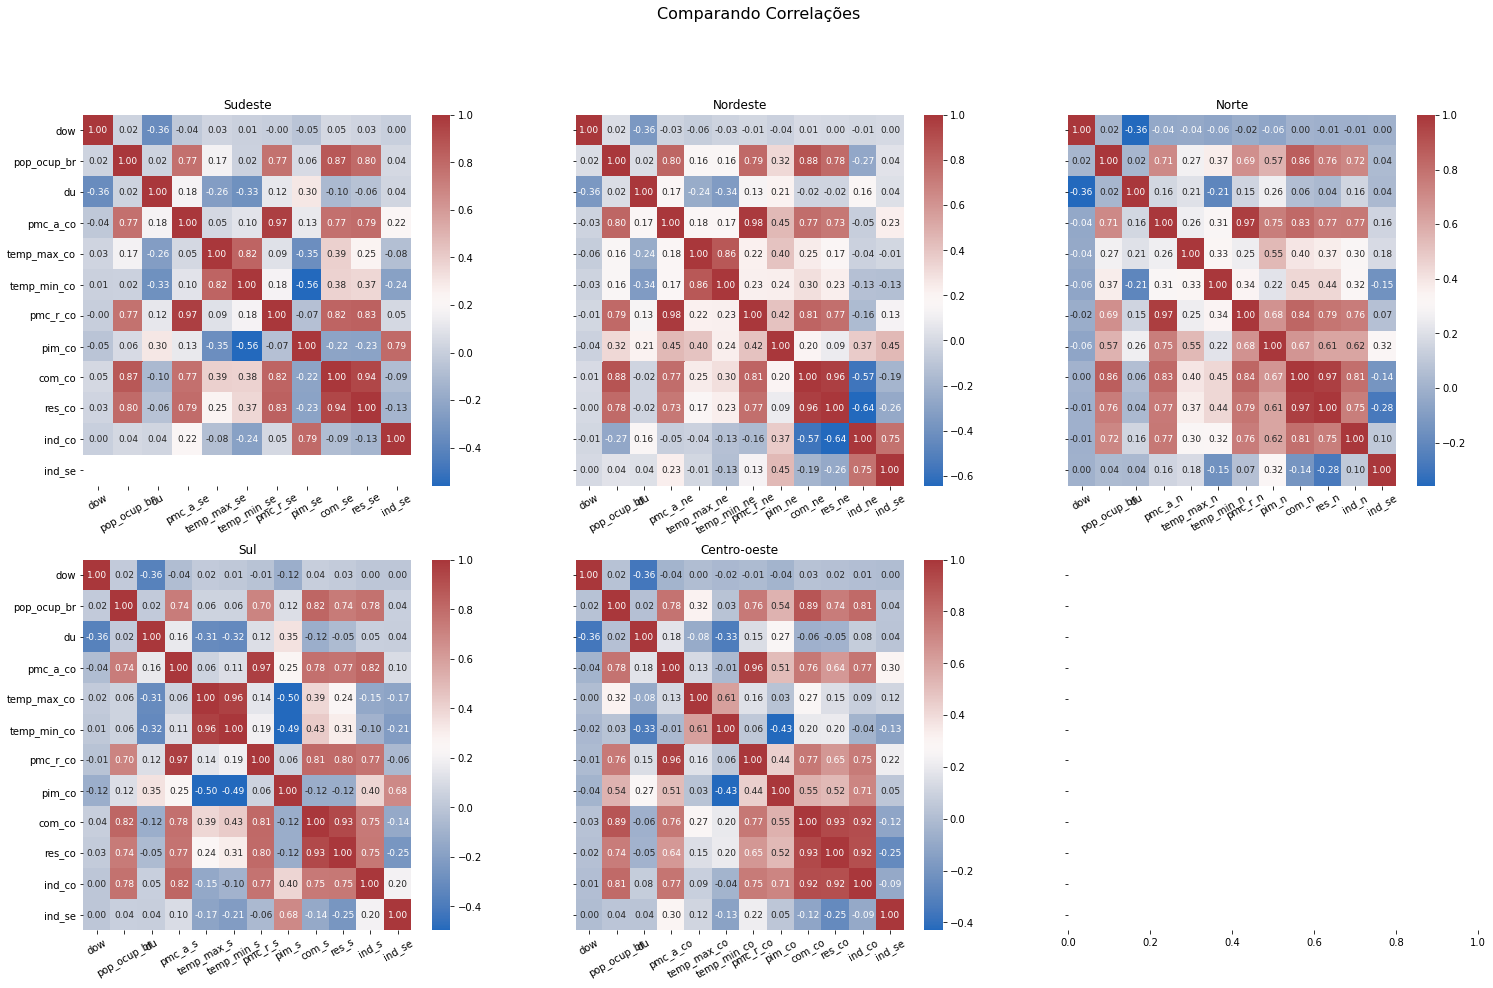

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(25,15), sharey=True)
fig.suptitle('Comparando Correlações', fontsize=16)
sns.despine(bottom = True, left = True)

Sudeste = sns.heatmap(dfse.corr(method='pearson'), annot=True, fmt='.2f', annot_kws={"size": 9}, cmap = "vlag",ax=axes[0,0])
axes[0,0].set_title('Sudeste')
plt.setp(Sudeste.get_xticklabels(), rotation=30)

Nordeste = sns.heatmap(dfne.corr(method='pearson'),vmax=1.0, annot=True, fmt='.2f', annot_kws={"size": 9}, cmap = "vlag", ax=axes[0,1])
axes[0,1].set_title('Nordeste')
plt.setp(Nordeste.get_xticklabels(), rotation=30)

Norte = sns.heatmap(dfn.corr(method='pearson'),vmax=1.0, annot=True, fmt='.2f', annot_kws={"size": 9}, cmap = "vlag", ax=axes[0,2])
axes[0,2].set_title('Norte')
plt.setp(Norte.get_xticklabels(), rotation=30)

Sul = sns.heatmap(dfs.corr(method='pearson'),vmax=1.0, annot=True, fmt='.2f', annot_kws={"size": 9}, cmap = "vlag", ax=axes[1,0])
axes[1,0].set_title('Sul')
plt.setp(Sul.get_xticklabels(), rotation=30)

Centrooeste = sns.heatmap(dfco.corr(method='pearson'),vmax=1.0, annot=True, fmt='.2f', annot_kws={"size": 9}, cmap = "vlag", ax=axes[1,1])
axes[1,1].set_title('Centro-oeste')
plt.setp(Centrooeste.get_xticklabels(), rotation=30);


Observando a última linha de cada matriz, podemos verificar os atributos mais correlacionados ao Consumo Industrial do Sudeste, são eles:
* Nordeste: ind_ne (alto), pin_ne (moderado)
* Sul: pim_s (alto)
* Cento-Oeste: Nenhum
* Norte: Nenhum
<br><br>


---
# Preparando dados para modelagem

**Com base nos coeficientes de correlação de Pearson, as colunas utilizadas no modelo serão:** 
1. 'data_tidy', 
2. 'year', 
3. 'month', 
4. 'dow', 
5. 'pop_ocup_br', 
6. 'du', 
7. 'pmc_a_se', 
8. 'temp_max_se' 
9. 'temp_min_se', 
10. 'pmc_r_se', 
11. 'pim_se', 
12. 'pim_s',
13. 'pim_ne', 
14. 'ind_ne',
15. 'ind_se'



In [ ]:
# Organize dataset into: Train, Test, Predict
dfmodel = df0.copy()
# extract month and year from dates
dfmodel['month'] = [i.month for i in dfmodel['data_tidy']]
dfmodel['year'] = [i.year for i in dfmodel['data_tidy']]
dfmodel['series'] = np.arange(1,len(dfmodel)+1)

#Relevant cols
dfmodel = dfmodel[['data_tidy', 'year', 'month', 'dow', 'pop_ocup_br', 'du', 'pmc_a_se', 'temp_max_se', 'temp_min_se', 'pmc_r_se', 'pim_se', 'pim_s','pim_ne', 'ind_ne','ind_se']]


# split data into train-test set
train_test = dfmodel[dfmodel['data_tidy'] < '2021-01-01'].copy()
train = train_test[train_test['year'] < 2018]
test = train_test[train_test['year'] >= 2018]

#predictions set
dfpred = dfmodel.copy()
dfpred = dfmodel.iloc[:,:-1] # drop target

# check shape
train.shape, test.shape, dfpred.shape

((168, 15), (36, 15), (228, 14))

# Modelagem

Antes de começarmos qualquer modelo de Machine Learning no PyCaret, precisamos configurar o ambiente e pipeline.
Além de realizar algumas tarefas básicas de processamento por padrão, atravéz da função **setup** o PyCaret também oferece uma ampla gama de recursos de pré-processamento que elevam estruturalmente um experimento de aprendizado de máquina médio a uma solução avançada.

Para nosso modelo utilizaremos a seguinte parametrização:
* **fold_strategy = 'timeseries':** Utiliza o módulo *sklearn.model_selection.TimeSeriesSplit* o qual fornece índices de treinamento / teste para dividir amostras de dados de série temporal que são observadas em intervalos de tempo fixos, em conjuntos de treinamento / teste. Em cada divisão, os índices de teste devem ser maiores do que antes e, portanto, embaralhar no validador cruzado é inadequado.
* **normalize_method = 'robust':** Dimensiona e traduz cada recurso de acordo com o intervalo interquartil. Quando o conjunto de dados contém outliers, o dimensionador robusto geralmente oferece melhores resultados.
* **fold = 10:** Quantidade de *folds* utilizado para *cross-validation*


**Esta função inicializa o ambiente de treinamento e cria o pipeline de transformação. Retorna uma tabela com todos os parâmetros utilizados**

In [ ]:
# This function initializes the training environment and creates the transformation pipeline. 
s = setup(data = train, 
          test_data = test, 
          target = 'ind_se', 
          fold_strategy = 'timeseries', 
          numeric_features = ['year', 'month', 'dow', 'pop_ocup_br', 'du', 'pmc_a_se', 'temp_max_se', 'temp_min_se', 'pmc_r_se', 'pim_se', 'pim_s','pim_ne', 'ind_ne'],
          date_features = ['data_tidy'],
          normalize = True,
          normalize_method = 'robust', #robust: scales and translates each feature according to the Interquartile range. When the dataset contains outliers, robust scaler often gives better results.
          fold = 10, 
          silent = True,
          session_id = 123 # make sure we use same random seeds
          )

,Description,Value
0,session_id,123
1,Target,ind_se
2,Original Data,"(168, 15)"
3,Missing Values,False
4,Numeric Features,13
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(168, 34)"


# Comparando melhores modelos

A função compare_models faz uma validação de uma série de modelos, comparando e ordenando-os de acordo com a métrica selecionada. Para o caso organizademos os modelos de acordo com o Mean Absolute Error. O MAE representa a média da diferença absoluta entre os valores reais e previstos no conjunto de dados. Ele mede a média dos resíduos no conjunto de dados.

Embora tenhamos uma tabela com todos os modelos testados, o resultado armazenado é somente um objeto indexado com os top 5 modelos que apresentaram melhor performance. 

In [ ]:
# Compare some models: Returns table of models available in the model library and their performance. May take up to 2 minutes to compare all models for the current dataset

# Save top 5 models
top5_raw = compare_models(sort='MAE', n_select = 5, turbo = False) 
# Get a dataframe with this info to be used on plotting
results = pull()
type(results)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,2.506241e+02,1.045017e+05,3.037969e+02,-3.775000e-01,0.0388,3.200000e-02,0.013
ransac,Random Sample Consensus,2.518992e+02,1.546676e+05,3.104934e+02,-1.290100e+00,0.0397,3.220000e-02,0.048
ridge,Ridge Regression,2.572654e+02,1.209714e+05,3.077469e+02,-1.144200e+00,0.0394,3.240000e-02,0.013
br,Bayesian Ridge,2.594037e+02,1.236394e+05,3.100449e+02,-1.213500e+00,0.0396,3.270000e-02,0.017
llar,Lasso Least Angle Regression,2.635767e+02,1.330159e+05,3.173183e+02,-1.324900e+00,0.0404,3.310000e-02,0.017
lasso,Lasso Regression,2.749896e+02,1.334600e+05,3.231990e+02,-1.533500e+00,0.0412,3.450000e-02,0.015
ard,Automatic Relevance Determination,2.867461e+02,1.361147e+05,3.383146e+02,-1.652900e+00,0.0432,3.590000e-02,0.105
et,Extra Trees Regressor,2.977830e+02,1.554556e+05,3.557592e+02,-1.239900e+00,0.0454,3.800000e-02,0.387
catboost,CatBoost Regressor,3.046634e+02,1.532825e+05,3.555381e+02,-1.331700e+00,0.0455,3.890000e-02,1.418
rf,Random Forest Regressor,3.071131e+02,1.588329e+05,3.687968e+02,-1.283400e+00,0.0471,3.910000e-02,0.426


pandas.core.frame.DataFrame

Com os modelos criados, podemos adicionar uma etapa de *'tunning'* dos parâmentros com base em um optimizador específico. Para o caso, seguimos utilizando o MAE como parâmetro. 

In [ ]:
# Tune top 5 models based on MAE
top5_t = [tune_model(i, optimize='MAE') for i in top5_raw]
# Overview of each tuned module tuned parameters
top5_t

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,116.2123,19771.1977,140.6101,0.3788,0.0179,0.0150
1,362.2526,166762.5331,408.3657,-1.2955,0.0503,0.0434
2,508.1401,431586.9755,656.9528,0.1084,0.0878,0.0697
3,163.3113,39521.1666,198.7993,0.8111,0.0252,0.0209
4,543.5338,356514.2148,597.0881,-11.6528,0.0738,0.0638
5,311.2694,152869.0055,390.9847,-2.4443,0.0484,0.0371
6,154.8443,38466.2154,196.1281,0.3856,0.0240,0.0187
7,230.2548,78360.9533,279.9303,-0.6095,0.0354,0.0295
8,127.6595,23336.1237,152.7617,0.5580,0.0210,0.0173
9,118.2892,22971.0512,151.5620,0.5115,0.0205,0.0159


[OrthogonalMatchingPursuit(fit_intercept=True, n_nonzero_coefs=9,
                           normalize=False, precompute='auto', tol=None),
 RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
                 loss='absolute_loss', max_skips=2, max_trials=13,
                 min_samples=0.4, random_state=123, residual_threshold=None,
                 stop_n_inliers=23, stop_probability=0.91, stop_score=inf),
 Ridge(alpha=7.73, copy_X=True, fit_intercept=True, max_iter=None,
       normalize=False, random_state=123, solver='auto', tol=0.001),
 BayesianRidge(alpha_1=0.001, alpha_2=0.01, alpha_init=None, compute_score=True,
               copy_X=True, fit_intercept=True, lambda_1=0.0005, lambda_2=1e-06,
               lambda_init=None, n_iter=300, normalize=False, tol=0.001,
               verbose=False),
 LassoLars(alpha=1.0, copy_X=True, eps=0.02, fit_intercept=True, fit_path=True,
           jitter=None, max_iter=500, normalize=True, positive=False,
         

# Avaliando modelos

Fazendo um double check da performance de cada modelo após etapa de tunning, percebemos que o melhor modedo sofreu uma melhora de cerca de 30 pontos no MAE, e continua tenho o melhor desenpenho dentre os modelos selecionados.

O modelo em questão é o **Orthogonal Matching Pursuit (OMP)** que foi desenvolvido para encontrar um vetor de solução esparso para um sistema linear de equações subdeterminado. OMP segue o procedimento de projeção para identificar os índices do suporte do vetor de solução esparsa, reavaliando seus coeficientes a cada iteração.

In [ ]:
# Results after tuning
r0 = predict_model(top5_t[0])
r1 = predict_model(top5_t[1])
r2 = predict_model(top5_t[2])
r3 = predict_model(top5_t[3])
r4 = predict_model(top5_t[4])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Orthogonal Matching Pursuit,221.8112,83661.8526,289.2436,0.4334,0.0393,0.0295


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Sample Consensus,591.645813,546488.0625,739.248291,-2.7013,0.0971,0.0794


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Ridge Regression,195.053894,72578.484375,269.4039,0.5084,0.0369,0.0262


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bayesian Ridge,248.2124,106180.0932,325.8529,0.2809,0.0445,0.0333


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Least Angle Regression,211.6535,79519.6677,281.9923,0.4614,0.0383,0.0282


Para ter uma melhor ideia do melhor modelo, temos a seguir os resultados de forma mais detalhada.

In [ ]:
# Evaluate best model: This function displays a user interface for all of the available plots for a given estimator
evaluate_model(top5_t[0]) 

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

Principais atributos:

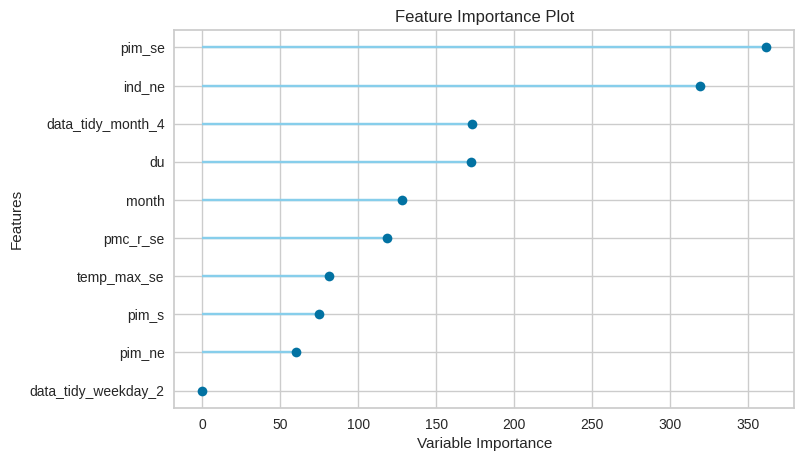

In [ ]:
#Ploted separatedly because od erros on evaluate_model
plot_model(top5_t[0], 'feature')

Temos as seguir uma comparação gráfica entre os modelos selecionados, podemos confirmar que o modelo selecionado está trazendo valores condizentes com o esperado.

In [ ]:
# Prepare datasets to graphical comparisson
new = dfpred[dfpred['data_tidy'] < '2021-01-01']
pred0 = predict_model(top5_t[0], data = new)
pred1 = predict_model(top5_t[1], data = new)
pred2 = predict_model(top5_t[2], data = new)
pred3 = predict_model(top5_t[3], data = new)
pred4 = predict_model(top5_t[4], data = new)

# Plot comparisson of models
fig = go.Figure([
        go.Scatter(
        name = '3º ' + results.Model[2],
        x = pred2.data_tidy,
        y = pred2.Label,
        marker=dict(color=px.colors.qualitative.Set3[8]),
        showlegend=True
    ),
    go.Scatter(
        name='2º ' + results.Model[1],
        x = pred1.data_tidy,
        y = pred1.Label,
        marker=dict(color=px.colors.qualitative.Set3[8]),
        showlegend=True
    ),
    go.Scatter(
        name='1º ' + results.Model[0],
        x = pred0.data_tidy,
        y = pred0.Label,
        marker=dict(color=px.colors.qualitative.Set3[5]),
        showlegend=True
    ),
    go.Scatter(
        name='Real data',
        x = dfse.data_tidy,
        y = dfse.ind_se,
        marker=dict(color=px.colors.qualitative.T10[4]),
        showlegend=True
    )
])
fig.update_layout(
    width=1800,
    height=800,
    yaxis_title='Consumo GWh',
    title='Comparação gráfica entre modelos',
    hovermode="x",
    template = 'none'
)

fig.show()

# Salvando melhor modelo

Com o modelo de melhor desempenho selecionado *Orthogonal Matching Pursuit (OMP)*, podemos gravar o pipiline de transformação bem como o modelo treinado para utilizarmos em nosso forecast.

*A função a seguir pega um objeto de modelo treinado e salva todo o pipeline de transformação e o objeto de modelo treinado como um arquivo pickle binário transferível para uso posterior.*



In [ ]:
# Finalize model do drop all trasholding
print(finalize_model(top5_t[0]))

OrthogonalMatchingPursuit(fit_intercept=True, n_nonzero_coefs=9,
                          normalize=False, precompute='auto', tol=None)


In [ ]:
final = save_model(top5_t[0], 'model_fcast_ind_se')
final 

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=['year', 'month',
                                                           'dow', 'pop_ocup_br',
                                                           'du', 'pmc_a_se',
                                                           'temp_max_se',
                                                           'temp_min_se',
                                                           'pmc_r_se', 'pim_se',
                                                           'pim_s', 'pim_ne',
                                                           'ind_ne'],
                                       target='ind_se',
                                       time_features=['data

# Forecast

Com o modelo treinado podemos testá-lo com dados novos. Para isso utilizaremos a parcela de dados com 'data_tidy' >= 01/01/2021

In [ ]:
# To load saved module and use it for predicting new values

new_data = dfpred[dfpred['data_tidy'] >= '2021-01-01'].copy()
pipeline = load_model('model_fcast_ind_se')
forecast = predict_model(pipeline, new_data)
predictions = predict_model(pipeline, dfpred[dfpred['data_tidy'] < '2021-01-01'].copy())
print(pipeline)
forecast

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=['year', 'month',
                                                          'dow', 'pop_ocup_br',
                                                          'du', 'pmc_a_se',
                                                          'temp_max_se',
                                                          'temp_min_se',
                                                          'pmc_r_se', 'pim_se',
                                                          'pim_s', 'pim_ne',
                                                          'ind_ne'],
                                      target='ind_se',
                   

,data_tidy,year,month,dow,pop_ocup_br,du,pmc_a_se,temp_max_se,temp_min_se,pmc_r_se,pim_se,pim_s,pim_ne,ind_ne,Label
204,2021-01-01,2021,1,4,85291.458634,20,101.597599,27.128683,23.132233,103.143866,78.170288,94.941000,96.300000,1907.27970,7215.085019
205,2021-02-01,2021,2,0,85007.546249,19,93.371718,25.865171,22.377857,94.828878,76.198104,95.624000,85.900000,1818.73298,7180.517559
206,2021-03-01,2021,3,0,85220.796427,23,102.869087,29.656336,21.058587,102.861504,82.737395,107.377658,93.146726,NaN,7619.427311
207,2021-04-01,2021,4,3,85515.493606,20,94.241224,28.071241,20.193866,95.278607,82.378939,102.218763,87.293167,NaN,7993.297241
208,2021-05-01,2021,5,5,85759.491015,21,95.191733,25.543384,17.997973,96.216951,89.213434,108.277568,91.134322,NaN,7879.101371
209,2021-06-01,2021,6,1,85981.966586,22,93.081274,25.084524,17.207192,93.248462,88.322010,104.216181,86.817602,NaN,7768.923703
210,2021-07-01,2021,7,3,86246.850625,22,94.597792,25.030878,16.524591,94.383083,92.415160,108.906742,93.237132,NaN,7890.320591
211,2021-08-01,2021,8,6,86663.297637,22,96.499363,25.456828,16.789763,95.671568,95.892364,112.955375,98.706458,NaN,8011.326581
212,2021-09-01,2021,9,2,87138.168671,21,91.508157,27.567455,18.683656,91.873176,91.650249,104.326637,97.543986,NaN,8010.273800
213,2021-10-01,2021,10,4,87673.088988,20,94.715525,28.260280,19.973731,95.422355,93.754645,109.992390,106.248098,NaN,8191.145561


In [ ]:
# Plot comparisson of models
fig = go.Figure([
    go.Scatter(
        name = 'Simulação',
        x = predictions.data_tidy,
        y = predictions.Label,
        marker=dict(color=px.colors.qualitative.Set3[8]),
        showlegend=True
    ),
    go.Scatter(
        name = 'Forecast',
        x = forecast.data_tidy,
        y = forecast.Label,
        marker=dict(color=px.colors.qualitative.Set3[5]),
        showlegend=True
    ),
    go.Scatter(
        name='Real data',
        x = dfmodel.data_tidy,
        y = dfmodel.ind_se,
        marker=dict(color=px.colors.qualitative.T10[4]),
        showlegend=True
    )
])
fig.update_layout(
    width=1800,
    height=800,
    yaxis_title='Consumo GWh',
    title='Forecast Consumo Elétrico Industrial na Região SE',
    hovermode="x",
    template = 'none'
)
fig.show()
plt.savefig( f'../forecast.png' ) 

<Figure size 576x396 with 0 Axes>